In [2]:
!pip install nltk


In [3]:
import nltk

In [4]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import glob
import os
import random
import cv2

from tensorflow.keras.layers import Dense,Flatten , Conv2D , MaxPooling2D , Dropout
from tensorflow.keras.models import Model , Sequential

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [6]:
SMS_SH_df = pd.read_csv("SMSSpamCollection",sep='\t')
SMS_SH_df.head(5)

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [7]:
SMS_SH_df = pd.read_csv("SMSSpamCollection",sep='\t',header=None)
SMS_SH_df.columns=['label','body_text']
SMS_SH_df.head(5)

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
SMS_SH_df.info

<bound method DataFrame.info of      label                                          body_text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [9]:
SMS_SH_df.describe

<bound method NDFrame.describe of      label                                          body_text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [10]:
SMS_SH_df.value_counts()

label  body_text                                                                                                                                                                                                                            
ham    Sorry, I'll call later                                                                                                                                                                                                                   30
       I cant pick the phone right now. Pls send a message                                                                                                                                                                                      12
       Ok...                                                                                                                                                                                                                                    10
       Wen ur lovable bcums angry 

In [11]:
SMS_SH_df.label.value_counts(normalize=True)

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

In [12]:
SMS_SH_df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [14]:
SMS_SH_df.isnull().value_counts()


label  body_text
False  False        5572
Name: count, dtype: int64

In [15]:
SMS_SH_df.dropna(inplace=True)

In [16]:
SMS_SH_df.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


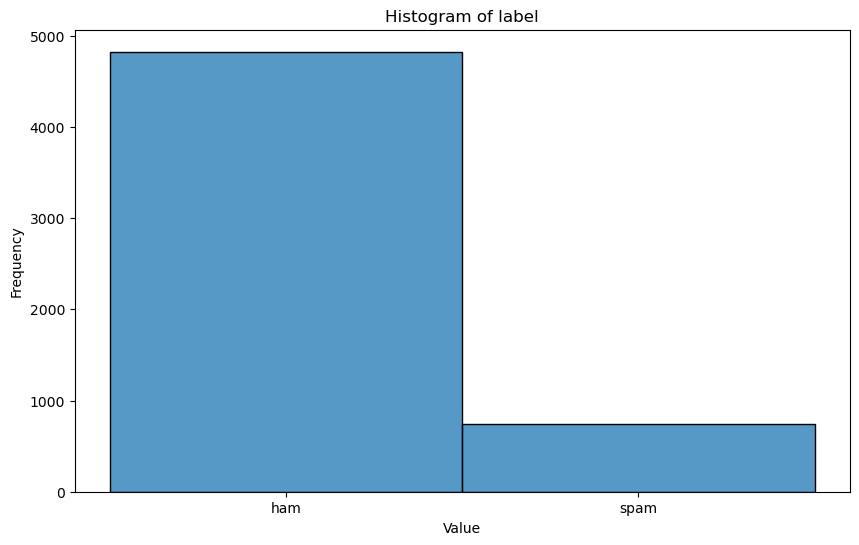

In [25]:

plt.figure(figsize=(10, 6))
sns.histplot(SMS_SH_df['label']) 
plt.title('Histogram of label')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

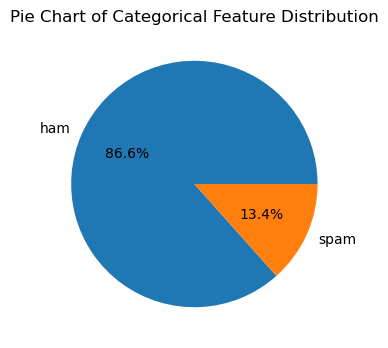

In [46]:

plt.figure(figsize=(4, 4))
SMS_SH_df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categorical Feature Distribution')
plt.ylabel('')
plt.show()


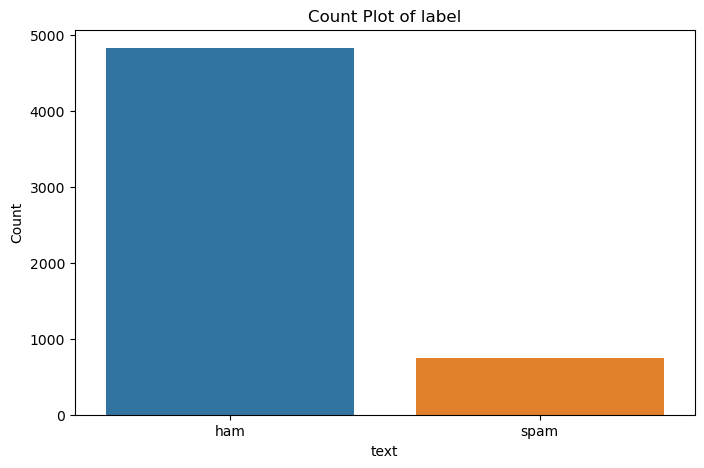

In [54]:
# Count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=SMS_SH_df)
plt.title('Count Plot of label')
plt.xlabel('text')
plt.ylabel('Count')
plt.show()
